# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目

在此文件中，我们提供给你了一个模板，以便于你根据项目的要求一步步实现要求的功能，进而完成整个项目。如果你认为需要导入另外的一些代码，请确保你正确导入了他们，并且包含在你的提交文件中。以**'练习'**开始的标题表示接下来你将开始实现你的项目。注意有一些练习是可选的，并且用**'可选'**标记出来了。

在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以'练习'开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**注意：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 连接 mnist 的字符来合成数据

你可以通过连接[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了快速导入数据集，我们可以使用 [Keras Datasets](https://keras.io/datasets/#mnist-database-of-handwritten-digits) [中文文档](http://keras-cn.readthedocs.io/en/latest/other/datasets/#mnist)。

### 载入 mnist

In [1]:
from keras.datasets import mnist

(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

Using TensorFlow backend.


### 可视化 mnist

我们可以通过 matplotlib 来可视化我们的原始数据集。

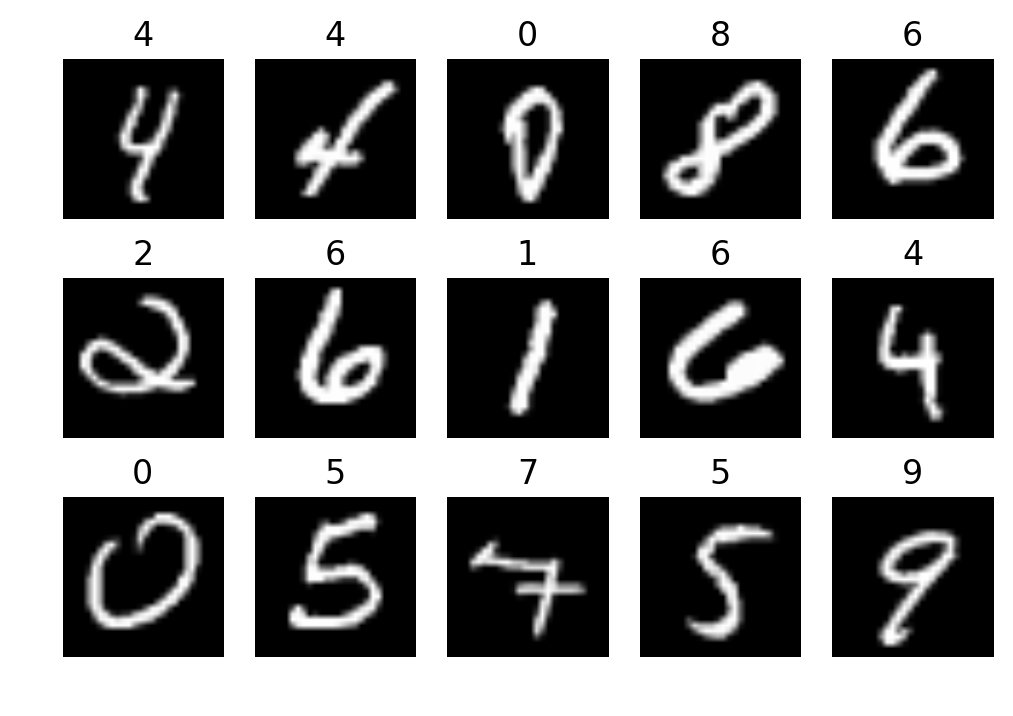

In [2]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')

### 练习：合成数据

你需要随机取随机张图片，然后将它们拼接成新的图片。


In [3]:
import numpy as np

n_class, n_len, image_width, image_height = 11, 5, 28, 28

def generate_dataset(X, y):
    X_len = X.shape[0]
    
    X_gen = np.zeros((X_len, image_height, image_width*n_len, 1), dtype=np.float32)
    y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    
    for i in range(X_len):
            sample_size = random.randint(1, 5)
            index_array = [random.randint(0, len(X)-1) for _ in xrange(sample_size)]
            
            counter = 0
            for index in index_array:
                temp = X[index]
                y_gen[counter][i][y[index]] = 1
                X_gen[i,:,counter * image_width:(counter+1)* image_width] = temp.reshape(temp.shape[0], temp.shape[1], 1)

                counter += 1
            
            k = sample_size
            
            if k < 5:
                while (5-k)>0:
                    y_gen[k][i][10] = 1
                    k += 1
    
    return X_gen, y_gen

X_train, y_train = generate_dataset(X_raw, y_raw)
X_test, y_test = generate_dataset(X_raw_test, y_raw_test)
print("done")

done


In [4]:
print ('Training set',X_train.shape, y_train[0].shape)
print ('Test set',X_test.shape, y_test[0].shape)

('Training set', (60000, 28, 140, 1), (60000, 11))
('Test set', (10000, 28, 140, 1), (10000, 11))


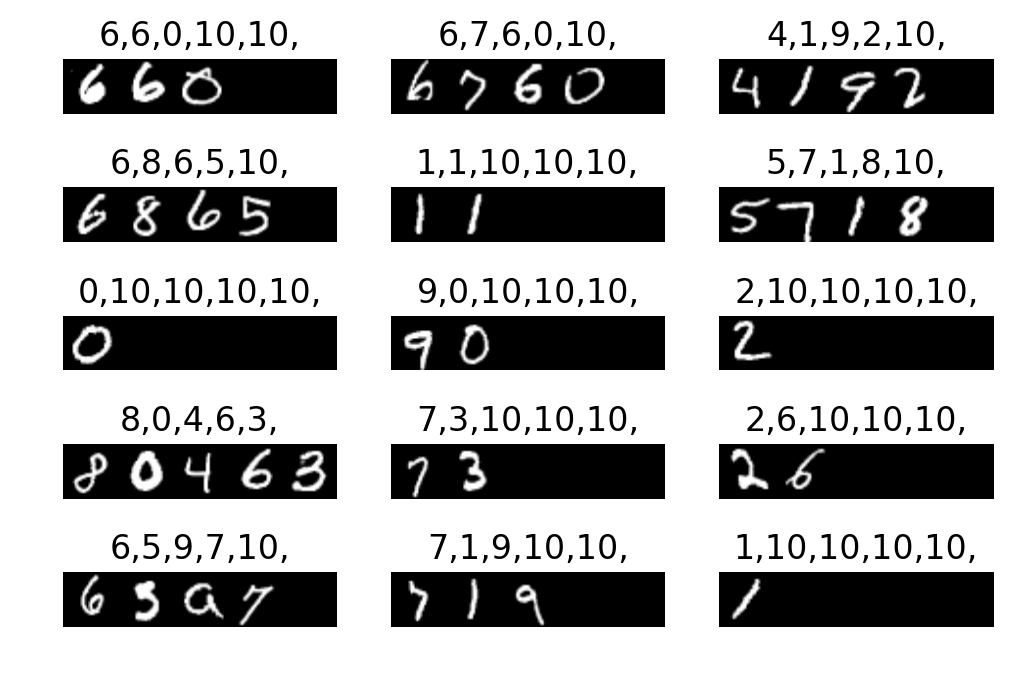

In [5]:
# 显示生成的图片
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ','
    
    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')
    plt.axis('off')

### 问题 1
_你是如何合成数据集的？_

**回答：** 
首先，我初始化了两个全为零的数组，分别作为图片集和标签列表，它们的大小和训练组／测试组的大小相对应。图片集里的每一个新图片会由五张mnist图片合成的，新图片的形状是28*140。标签集中共有11个标签，都是独热编码，1对应的标签和其数字对应，除了10代表无数字无图片。

然后，在循环中，针对每一个新图片，我先随机生成1-5间的整数，作为有内容的需要拼接的图片数量，并设置相应的标签。将它们分别拼接之后，再把剩下空白图片的标签的第10位设为1。



### 练习：设计并测试一个模型架构

设计并实现一个能够识别数字序列的深度学习模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。

在思考这个问题的时候有很多方面可以考虑：

- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在每个分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

在使用 Keras 搭建模型的时候，你可以使用 [泛型模型](http://keras-cn.readthedocs.io/en/latest/models/model/) 的方式来搭建多输出模型。

In [6]:
from keras.models import Model
from keras.layers import *

img_rows = 28
img_cols = 140

batch_size = 64
nb_classes = 11
nb_epoch = 10
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

In [7]:
# the data, shuffled and split between train and test sets

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')


img_input = Input(shape = X_train.shape[1:])

x = img_input
x = Convolution2D(nb_filters, kernel_size[0], kernel_size[1], activation = 'relu', border_mode='same')(x)
x = Convolution2D(nb_filters, kernel_size[0], kernel_size[1], activation = 'relu')(x)
x = MaxPooling2D(pool_size = pool_size) (x)
x = Dropout(0.5)(x)
x = Flatten()(x)

outs = []

for i in range(5):
    out = Dense(128, activation='relu')(x)
    out = Dense(nb_classes, activation = 'softmax', name = 'num%d'%(i+1))(x)
    outs.append(out)

model = Model(img_input, outs)


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




('X_train shape:', (60000, 28, 140, 1))
(60000, 'train samples')


### 问题 2
_你为解决这个问题采取了什么技术？请详细介绍你使用的技术。_

**回答：** 
我用到了如下图所示的技术（卷积神经网络）。首先是两层二维卷基层，每层卷积层由32个卷积单元组成，每个卷积单元的参数都是通过反向传播算法优化得到的，每一层提取训练图片的的不同特征。激活函数用了ReLU, ReLU可以削弱梯度的消失。

之后用了最大池化，有控制过拟合和提高计算速度的效果。

再之后用了0.5的Dropout, 也是防止过拟合。

然后扁平化参数，之后分别输出到5个有128个神经元的全连接层，再最后通过激活函数为Softmax的全连接层来达到为5个数字分别分类。

参考资料：
https://zh.wikipedia.org/wiki/%E5%8D%B7%E7%A7%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C

In [10]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 28, 140, 1)    0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 28, 140, 32)   320         input_1[0][0]                    
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 26, 138, 32)   9248        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 13, 69, 32)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

### 可视化你的网络模型

参考链接：[visualization](http://keras-cn.readthedocs.io/en/latest/other/visualization/)

可以是 PNG 格式，也可以是 SVG 格式。

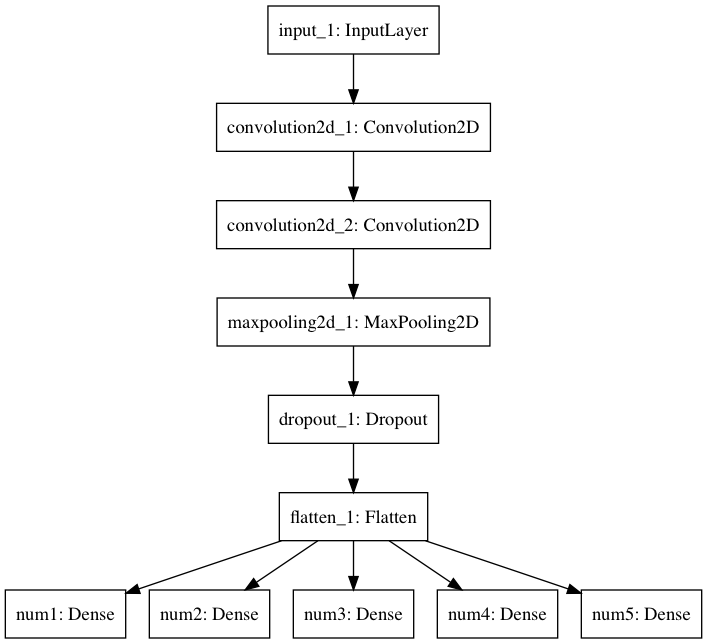

In [20]:
from keras.utils.visualize_util import plot, model_to_dot
from IPython.display import Image, SVG

# TODO: 可视化你的模型
plot(model, to_file='model.png')

Image("model.png")

### 问题 3
_你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 如何连接等）_

**回答：**


### 练习：训练你的网络模型

你需要设置20%的数据作为验证集，以保证模型没有过拟合。

In [22]:
# TODO: 训练你的模型
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_split= 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 612s - loss: 1.2983 - num1_loss: 0.3431 - num2_loss: 0.3044 - num3_loss: 0.2617 - num4_loss: 0.2196 - num5_loss: 0.1695 - num1_acc: 0.9040 - num2_acc: 0.9145 - num3_acc: 0.9275 - num4_acc: 0.9440 - num5_acc: 0.9618 - val_loss: 0.3467 - val_num1_loss: 0.0958 - val_num2_loss: 0.0811 - val_num3_loss: 0.0669 - val_num4_loss: 0.0679 - val_num5_loss: 0.0350 - val_num1_acc: 0.9707 - val_num2_acc: 0.9744 - val_num3_acc: 0.9803 - val_num4_acc: 0.9798 - val_num5_acc: 0.9888
Epoch 2/10
48000/48000 [==============================] - 626s - loss: 0.3932 - num1_loss: 0.1137 - num2_loss: 0.0979 - num3_loss: 0.0852 - num4_loss: 0.0599 - num5_loss: 0.0365 - num1_acc: 0.9636 - num2_acc: 0.9683 - num3_acc: 0.9727 - num4_acc: 0.9813 - num5_acc: 0.9884 - val_loss: 0.2634 - val_num1_loss: 0.0826 - val_num2_loss: 0.0570 - val_num3_loss: 0.0497 - val_num4_loss: 0.0467 - val_num5_loss: 0.0274 - val_num1_

### 练习：计算你的模型准确率

我们刚才得到了模型每个数字的准确率，现在让我们来计算整体准确率，按照完全预测正确数字序列的标准来计算。

比如 1,2,3,10,10 预测成了 1,2,10,10,10 算错，而不是算对了80%。

In [25]:
y_pred_list = model.predict(X_test, verbose = 1)

10000/10000 [==============================] - 31s    


In [42]:
def evaluate(model):
    right = 0
    error = 0
    
    # TODO: 按照错一个就算错的规则计算准确率
    
    for i in range(10000): 
        isCorrect = True
        for j in range(5):
            pred_list_i = [y_pred_list[j][i] for y_pred in y_pred_list[j]]
            val_list_i  = [y_test[j][i] for y_val in y_test[j]]
            for pred, val in zip(pred_list_i, val_list_i):
                if (pred.argmax(-1) != val.argmax(-1)):
                    isCorrect = False
                    
            if isCorrect == False:
                break
        if isCorrect:
            right += 1
        else:
            error += 1
            
        if(i%1000 == 0):
            print('Current progress: ', i)
            
    print right
    return float(right)/(right+error)

accuracy = evaluate(model)

('Current progress: ', 0)
('Current progress: ', 1000)
('Current progress: ', 2000)
('Current progress: ', 3000)
('Current progress: ', 4000)
('Current progress: ', 5000)
('Current progress: ', 6000)
('Current progress: ', 7000)
('Current progress: ', 8000)
('Current progress: ', 9000)
9295


In [43]:
print 'Accuracy is', accuracy

Accuracy is 0.9295


### 问题 4

_你的模型准确率有多少？你觉得你的模型足以解决问题吗？_

**回答：** 我的模型准确率有92.95%。由于准确率比较接近1，我认为我的模型可以在比较大的程度上解决手写数字识别的问题。

### 预测值可视化

我们将模型的预测结果和真实值画出来，观察真实效果。

(-0.5, 139.5, 27.5, -0.5)

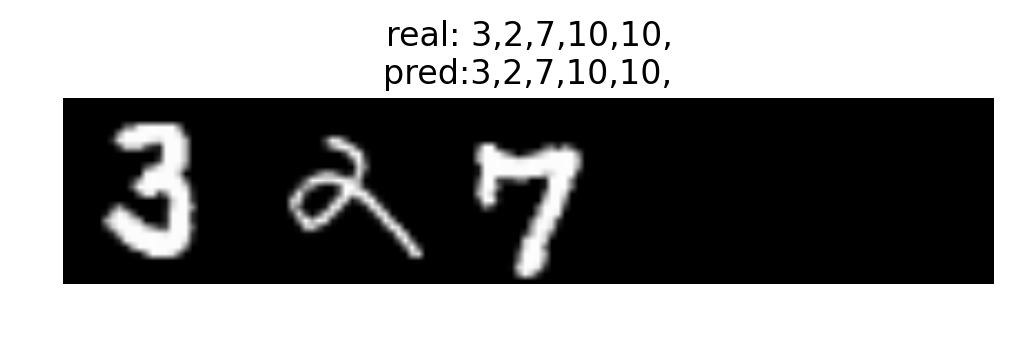

In [44]:
def get_result(result):
    # 将 one_hot 编码解码
    resultstr = ''
    for i in range(n_len):
        resultstr += str(np.argmax(result[i])) + ','
    return resultstr

index = random.randint(0, n_test-1)
y_pred = model.predict(X_test[index].reshape(1, image_height, image_width*n_len, 1))

plt.title('real: %s\npred:%s'%(get_result([y_test[x][index] for x in range(n_len)]), get_result(y_pred)))
plt.imshow(X_test[index,:,:,0], cmap='gray')
plt.axis('off')

### 保存模型

模型达到满意的效果以后，我们需要将模型的权值和结构保存，以便下次调用。

In [46]:
model.save_weights('model.h5')
with open('model.json', 'w') as f:
    f.write(model.to_json())